<div style="background-color:#116AF0; color:#19180F; font-size:24px; font-family:Verdana; padding:14px; border: 5px solid #19180F;"> Table of Contents </div>

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
1. Data Preprocessing <br>
2. Feature Engineering<br>
3. Exploratory Data Analysis<br>
4. Model Selection<br>
5. Hyperparameter tuning<br>
6. Feature Importances<br>
7. Model Interpretation<br>

</div>


<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
1. Data Preprocessing <br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Importing modules <br>
</div>

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
# Import necessary libraries for model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings

# Filter the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
import shap



<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
In the code snippet, dataframe is being read and its date column values are converted to datetime. <br>
</div>

In [2]:

# Load the dataset
df = pd.read_csv('/kaggle/input/dairy-goods-sales-dataset/dairy_dataset.csv')

df['Date'] = pd.to_datetime(df['Date'])


<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
2. Feature Engineering<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
In the following code snippet, We created `Total Value` as an additional feature <br>
</div>

In [3]:

df['Total Value'] = df['Quantity (liters/kg)'] * df['Price per Unit']


<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
3. Exploratory Data Analysis<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
In the code snippet, We perfom descriptive statistics for numerical values <br>
</div>

In [4]:
df.describe()


,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Similarly, Descriptive statistics for categorical values are performed <br>
</div>

In [5]:
df.describe(include='object')


,Location,Farm Size,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,10,11,5,1405,1441,15,3
top,Delhi,Large,Curd,Amul,Refrigerated,2022-01-13,2019-07-27,Delhi,Retail
freq,525,1462,479,1053,2459,9,9,499,1478


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting the correlation matrix <br>
</div>

/tmp/ipykernel_1200/3457783933.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


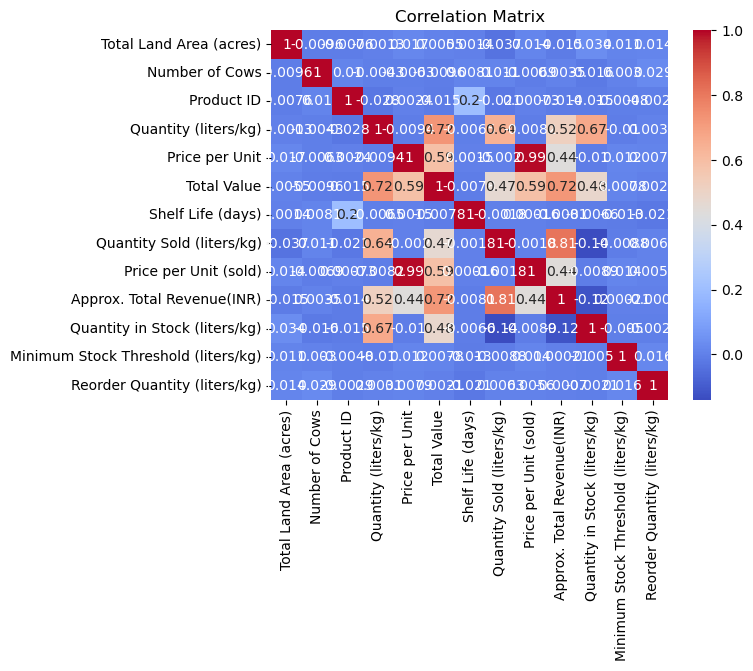

In [6]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting the distribution of numerical variables <br>
</div>

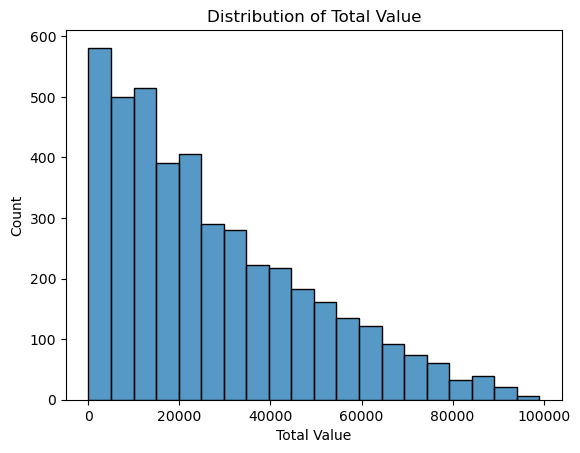

In [7]:
sns.histplot(data=df, x='Total Value', bins=20)
plt.title('Distribution of Total Value')
plt.show()


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting boxplot for numerical values <br>
</div>

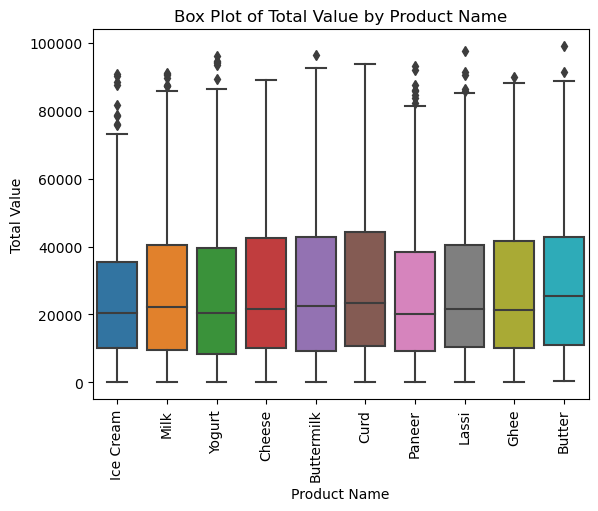

In [8]:
sns.boxplot(data=df, x='Product Name', y='Total Value')
plt.title('Box Plot of Total Value by Product Name')
plt.xticks(rotation=90)
plt.show()


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting count plot for categorical variables <br>
</div>

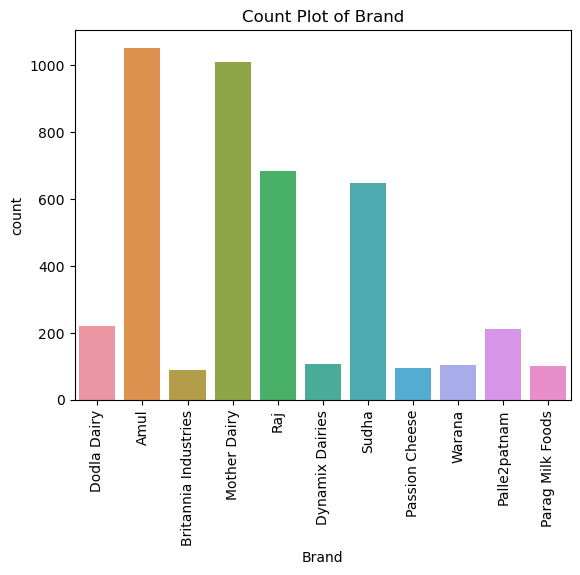

In [9]:
sns.countplot(data=df, x='Brand')
plt.title('Count Plot of Brand')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting scatter plot for two numerical variables<br>
</div>

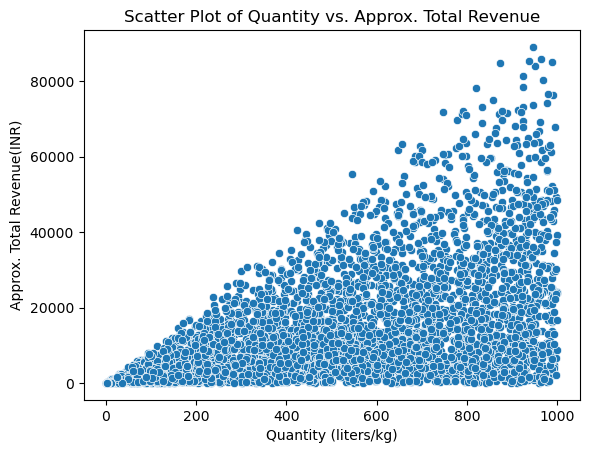

In [10]:
sns.scatterplot(data=df, x='Quantity (liters/kg)', y='Approx. Total Revenue(INR)')
plt.title('Scatter Plot of Quantity vs. Approx. Total Revenue')
plt.show()


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting scatter plot for multiple numerical variables<br>
</div>

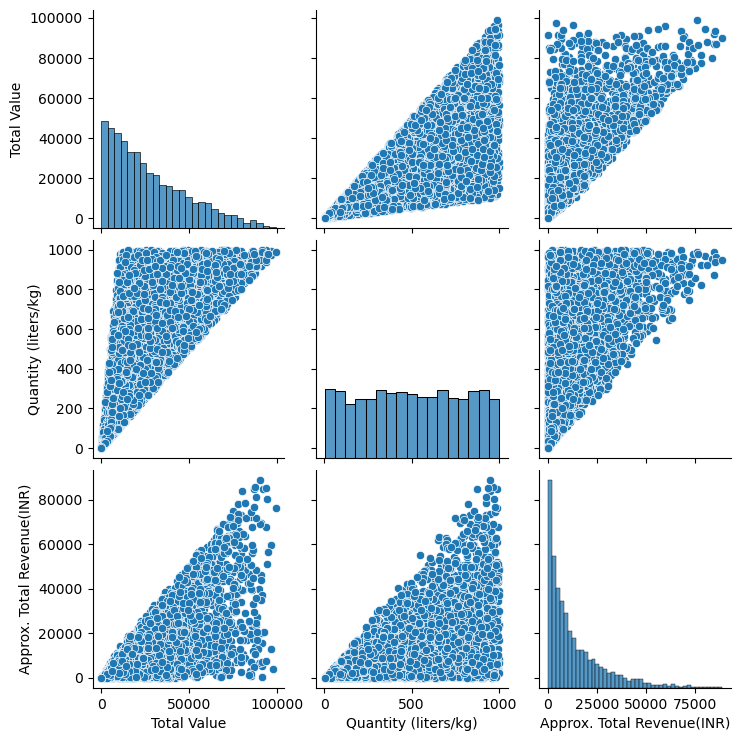

In [11]:
sns.pairplot(data=df, vars=['Total Value', 'Quantity (liters/kg)', 'Approx. Total Revenue(INR)'])
plt.show()


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Performing outlier detection <br>
</div>

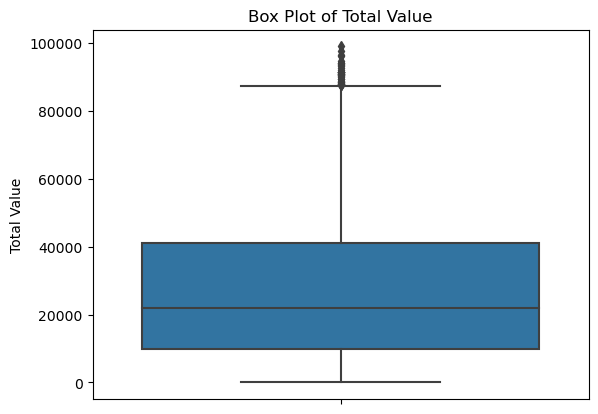

In [12]:
sns.boxplot(data=df, y='Total Value')
plt.title('Box Plot of Total Value')
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Checking for missing values in the dataframe via heatmap<br>
</div>

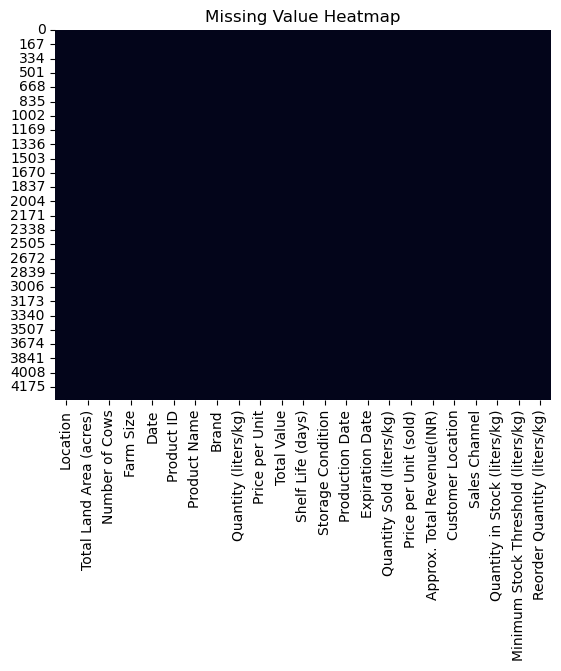

In [13]:

sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
No missing values observed <br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Treatment of outliers using z-score is done to ensure non-tree models which are not robust to outliers perform well, too <br>
</div>

In [15]:
z_scores = zscore(df['Total Value'])
df_no_outliers = df[(z_scores < 3)]


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting the relationship between variables using barplot <br>
</div>

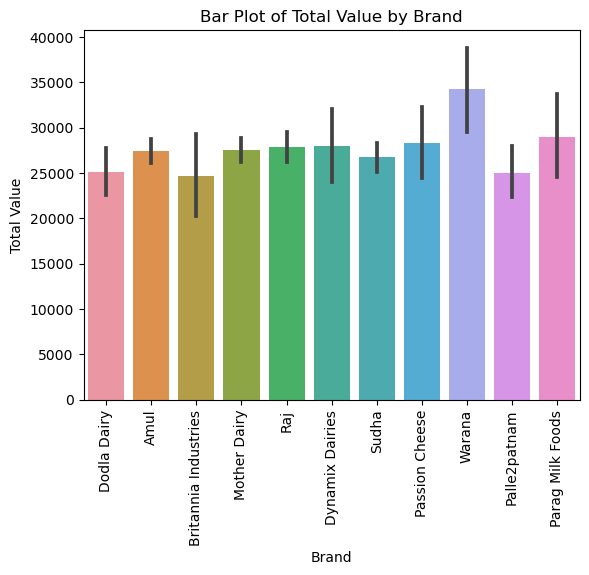

In [16]:
sns.barplot(data=df, x='Brand', y='Total Value')
plt.title('Bar Plot of Total Value by Brand')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Plotting lineplot to decipher total value trend over time <br>
</div>

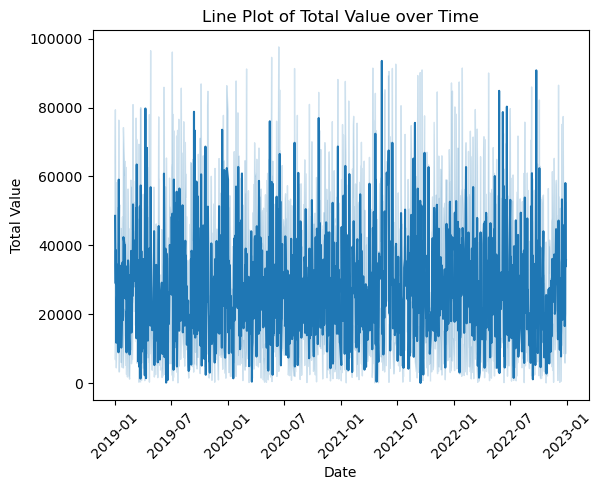

In [17]:
sns.lineplot(data=df, x='Date', y='Total Value')
plt.title('Line Plot of Total Value over Time')
plt.xticks(rotation=45)
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Creating additional variable for EDA <br>
</div>

In [18]:
# Feature engineering for EDA
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Agreegating values by month and brand <br>
</div>

In [19]:
# Grouping and aggregation
#Total Value by Month and Brand
monthly_brand_total = df.groupby(['Month', 'Brand'])['Total Value'].sum().reset_index()


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Visualizing aggregated data with legend<br>
</div>

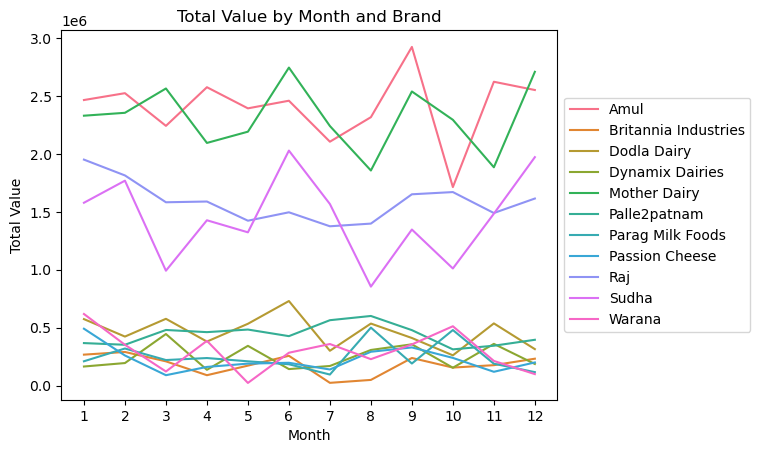

In [20]:
sns.lineplot(data=monthly_brand_total, x='Month', y='Total Value', hue='Brand')
plt.title('Total Value by Month and Brand')
plt.xticks(range(1, 13))

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Dropping month and year since EDA is done! <br>
</div>

In [21]:
#dropping month and year
df.drop(['Month','Year'],axis=1, inplace=True)


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Performing sanity check of the dataframe <br>
</div>

In [22]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Checking the columns of the dataframe for next step <br>
</div>

In [23]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
4. Model Selection<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Creating feature and target variables and splitting it into train and test sets <br>
</div>

In [24]:
# Prepare the data for modeling
X = df.drop(columns=['Approx. Total Revenue(INR)'])
y = df['Approx. Total Revenue(INR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Defining the numerical and categorical variables <br>
</div>

In [25]:
categorical_cols = ['Location', 'Farm Size', 'Product Name', 'Brand', 'Customer Location', 'Sales Channel']
numerical_cols = ['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Price per Unit',
                  'Total Value', 'Shelf Life (days)', 'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
                  'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
                  'Reorder Quantity (liters/kg)']


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code defines a `ColumnTransformer` to perform one-hot encoding on specified categorical features while keeping the remaining features unchanged. The transformer is configured with the `OneHotEncoder` for categorical features and the `'passthrough'` strategy for the remaining features. This allows for preprocessing and encoding of categorical data while preserving the original numerical data. <br>
</div>

In [26]:
categorical_features = ['Location', 'Product Name', 'Brand', 'Storage Condition', 'Customer Location', 'Sales Channel']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code defines a `ColumnTransformer` object named `preprocessor` that applies specific preprocessing steps to categorical and numerical columns in a dataset. The categorical columns are processed using the `cat_preprocessor`, while the numerical columns are processed using the `num_preprocessor`. <br>
</div>

In [27]:
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, categorical_cols),
    ('num', num_preprocessor, numerical_cols)
])


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code performs preprocessing on the training data (`X_train`) using the preprocessor pipeline (`preprocessor.fit_transform()`), and applies the same preprocessing to the test data (`X_test`) using `preprocessor.transform()`. <br>
</div>

In [28]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code normalizes the target variable by applying standard scaling to both the training and test sets, ensuring that the target variable has zero mean and unit variance. <br>
</div>

In [29]:
scaler = StandardScaler()
y_train_normalized = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler.transform(y_test.values.reshape(-1, 1))

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Base models are defined<br>
</div>

In [30]:
# Define the base models
base_models = [
    ('linear_regression', LinearRegression()),
    ('decision_tree', DecisionTreeRegressor()),
    ('knn', KNeighborsRegressor())
]

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Stacking, bagging, boosting and voting models are defined in the following code. <br>
</div>

In [31]:

# Define the stacking ensemble model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Define the bagging ensemble model
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor())

# Define the boosting ensemble model
boosting_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

# Define the voting ensemble model
voting_model = VotingRegressor(estimators=base_models)


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
All models are combined and appended into a list for processing <br>
</div>

In [32]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Stacking', stacking_model),
    ('Bagging', bagging_model),
    ('Boosting', boosting_model),
    ('Voting', voting_model)
]


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code performs k-fold cross-validation for multiple models to evaluate their performance in terms of mean squared error (MSE), printing the mean MSE for each model.
 <br>
</div>

In [33]:
k = 5  # Number of folds
mse_scores = []

for model_name, model in models:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_preprocessed, y_train_normalized.ravel(), cv=cv, scoring='neg_mean_squared_error')
    mse_scores.append((-1) * scores)
    mean_mse = np.mean((-1) * scores)
    print(f'{model_name}: Mean MSE = {mean_mse}')


Linear Regression: Mean MSE = 0.09180075464809431
Decision Tree: Mean MSE = 0.013635335281145803
KNN: Mean MSE = 0.10406126204347863
Stacking: Mean MSE = 0.012021797745351467
Bagging: Mean MSE = 0.0054896567791000005
Boosting: Mean MSE = 0.005300447780346108
Voting: Mean MSE = 0.031732969380963774


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code compares the models based on their mean mean squared error (MSE) scores and visualizes the comparison using a boxplot. <br>
</div>

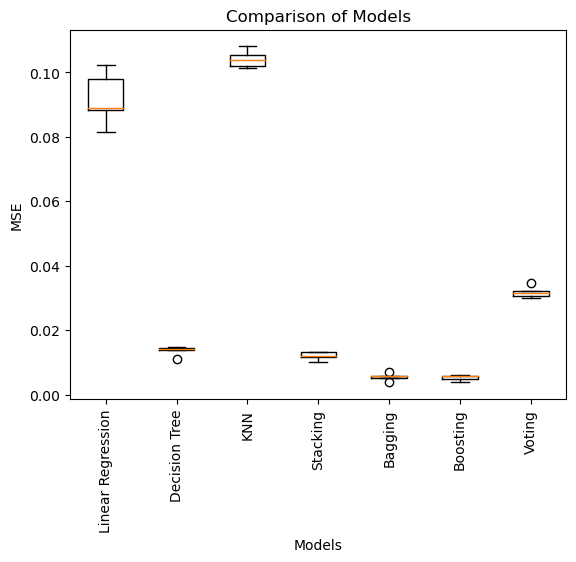

In [34]:
# Compare the models based on mean MSE
model_names = [model_name for model_name, _ in models]
plt.boxplot(mse_scores, labels=model_names)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title('Comparison of Models')
plt.show()

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
5. Hyperparameter tuning<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
Params grid are defined for each model <br>
</div>

In [35]:
# Hyperparameter grid for Linear Regression
linear_regression_params = {
    'fit_intercept': [True, False],
}

# Hyperparameter grid for Decision Tree
decision_tree_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Hyperparameter grid for Stacking
stacking_params = {
    'final_estimator__fit_intercept': [True, False],
}

# Hyperparameter grid for Bagging
bagging_params = {
    'n_estimators': [10, 20, 30],
    'base_estimator__max_depth': [None, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10]
}

# Hyperparameter grid for Boosting
boosting_params = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'base_estimator__max_depth': [None, 5],
    'base_estimator__min_samples_split': [10]
}

# Hyperparameter grid for Voting
voting_params = {
    'weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1]]
}


In [36]:
# Define the parameter grid for each model
param_grids = [
    linear_regression_params,
    decision_tree_params,
    knn_params,
    stacking_params,
    bagging_params,
    boosting_params,
    voting_params
]

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code performs hyperparameter tuning for each model in a given list of models by using GridSearchCV. It prints the best hyperparameters and the corresponding best mean squared error (MSE) for each model. <br>
</div>

In [37]:
# Perform hyperparameter tuning for each model
best_estimators = []
best_scores = []

for (model_name, model), param_grid in zip(models, param_grids):
    print(f'Tuning hyperparameters for {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=k, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_preprocessed, y_train_normalized.ravel())
    best_estimators.append((model_name, grid_search.best_estimator_))
    best_scores.append((-1) * grid_search.best_score_)
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best Mean MSE: {-1 * grid_search.best_score_}\n')


Tuning hyperparameters for Linear Regression...
Best Parameters: {'fit_intercept': False}
Best Mean MSE: 0.09194036476535342

Tuning hyperparameters for Decision Tree...
Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Best Mean MSE: 0.012606188516805677

Tuning hyperparameters for KNN...
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Mean MSE: 0.09807746850086704

Tuning hyperparameters for Stacking...
Best Parameters: {'final_estimator__fit_intercept': True}
Best Mean MSE: 0.01186608001672631

Tuning hyperparameters for Bagging...


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

Best Parameters: {'base_estimator__max_depth': 10, 'base_estimator__min_samples_split': 2, 'n_estimators': 30}
Best Mean MSE: 0.004766208015158146

Tuning hyperparameters for Boosting...


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

Best Parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 10, 'learning_rate': 0.1, 'n_estimators': 50}
Best Mean MSE: 0.004227606399350849

Tuning hyperparameters for Voting...
Best Parameters: {'weights': [1, 2, 1]}
Best Mean MSE: 0.021686620555777702



<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code performs k-fold cross-validation on a set of models, evaluates their performance using mean squared error (MSE), and prints the mean MSE for each model. <br>
</div>

In [39]:
# Evaluate the best models using k-fold cross-validation
mse_scores = []
for model_name, model in best_estimators:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_preprocessed, y_train_normalized.ravel(), cv=cv, scoring='neg_mean_squared_error')
    mse_scores.append((-1) * scores)
    mean_mse = np.mean((-1) * scores)
    print(f'{model_name}: Mean MSE = {mean_mse}')


Linear Regression: Mean MSE = 0.0918007764592383
Decision Tree: Mean MSE = 0.012850637808063304
KNN: Mean MSE = 0.09617086559817335
Stacking: Mean MSE = 0.01176210040218206
Bagging: Mean MSE = 0.0047051382183409315
Boosting: Mean MSE = 0.004546398575645617
Voting: Mean MSE = 0.021017922916530395


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code compares the performance of different models based on their mean MSE scores and visualizes the comparison using a boxplot. <br>
</div>

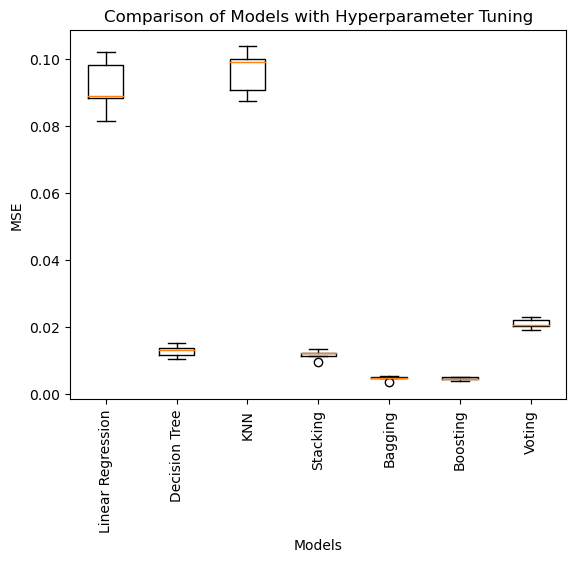

In [41]:
# Compare the models based on mean MSE
model_names = [model_name for model_name, _ in best_estimators]
plt.boxplot(mse_scores, labels=model_names)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title('Comparison of Models with Hyperparameter Tuning')
plt.show()

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
6. Feature Importances<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
One of the best models which have feature importances are fitted for exploration <br>
</div>

In [65]:
#fitting the best model
decision_tree= DecisionTreeRegressor().fit(X_train_preprocessed, y_train_normalized.ravel())


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code retrieves the column names used in the ColumnTransformer preprocessing step. It converts the preprocessed training data into a DataFrame. Then, it calculates and prints the feature importances of the decision tree model if available, or it displays a message indicating that the model does not have feature importances. <br>
</div>

In [72]:
# Retrieve column names from ColumnTransformer
categorical_transformer = preprocessor.named_transformers_['cat']
categorical_feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(input_features=categorical_cols)
feature_names = list(categorical_feature_names) + numerical_cols

# Convert X_train_preprocessed to a DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=feature_names)

# Obtain feature importances
if hasattr(decision_tree, 'feature_importances_'):
    feature_importances = decision_tree.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Print feature importances
    print('Feature Importances for Decision Tree:')
    for i in sorted_indices:
        print(f'{feature_names[i]}: {feature_importances[i]}')
else:
    print('The Decision Tree model does not have feature importances.')

Feature Importances for Decision Tree:
Quantity Sold (liters/kg): 0.6256160941013114
Total Value: 0.2859746574764568
Price per Unit (sold): 0.0628839252974064
Quantity in Stock (liters/kg): 0.01407742823600192
Price per Unit: 0.00900262583279232
Total Land Area (acres): 0.00037150814109969827
Number of Cows: 0.0002516057052370078
Reorder Quantity (liters/kg): 0.00019397566369742117
Shelf Life (days): 0.0001837484644811247
Minimum Stock Threshold (liters/kg): 0.00017792586097396525
Product Name_Yogurt: 0.0001523660215986558
Sales Channel_Retail: 0.000137352844200136
Quantity (liters/kg): 0.00011155354461528385
Location_Tamil Nadu: 8.692780802165854e-05
Brand_Sudha: 7.547568937647407e-05
Product Name_Ice Cream: 6.106338142719293e-05
Location_Gujarat: 6.040394019488523e-05
Sales Channel_Wholesale: 5.329654443668759e-05
Location_Kerala: 5.226839553927479e-05
Location_Rajasthan: 3.7303363425047596e-05
Farm Size_Medium: 3.258979942626744e-05
Farm Size_Large: 3.1770125416672574e-05
Product Na

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
7. Model Interpretation<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;"> 
The code performs the following steps:<br>
<br><br>
1. It converts the preprocessed training data (`X_train_preprocessed`) to a NumPy array (`X_train_preprocessed_array`).<br><br>
2. It initializes the SHAP explainer with the decision tree model and the preprocessed training data array.<br><br>
3. It calculates the Shapley values for the training data using the SHAP explainer.<br><br>
4. It visualizes the Shapley values using a summary plot and custom feature names, and displays the plot.<br><br>

The color scheme used in the summary plot can vary depending on the specific implementation and settings. By default, SHAP uses a blue-red color gradient, where blue represents lower feature values and red represents higher feature values.  <br>
</div>

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


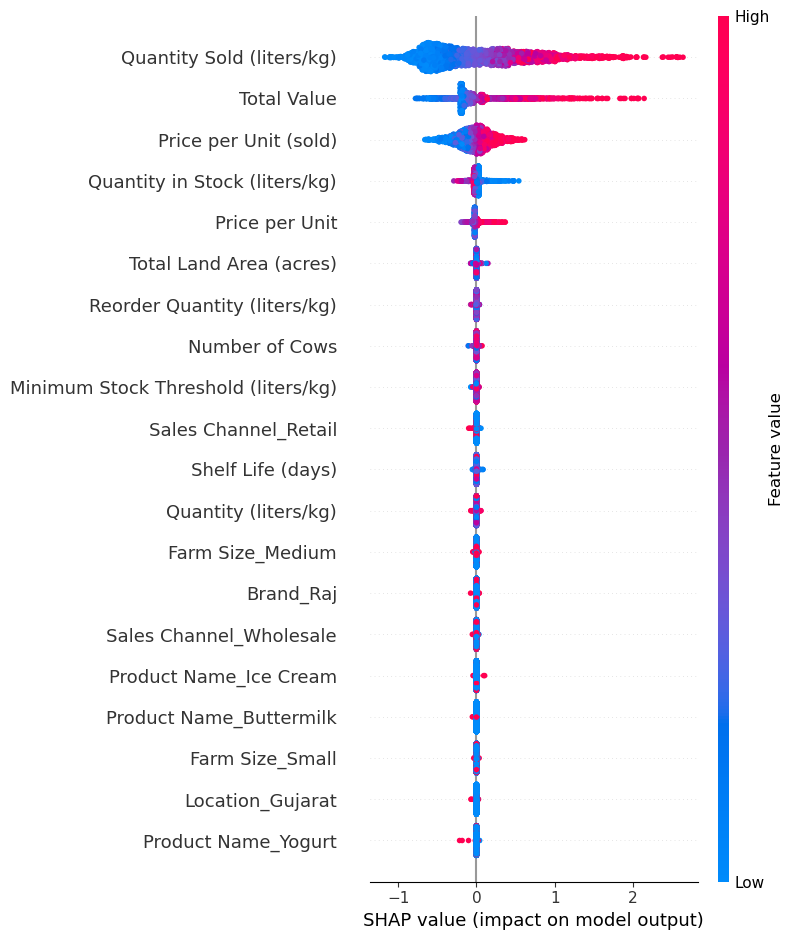

In [78]:
# Convert X_train_preprocessed to a NumPy array
X_train_preprocessed_array = X_train_preprocessed.toarray()


# Initialize the SHAP explainer with the decision tree model and training data
explainer = shap.Explainer(decision_tree, X_train_preprocessed_array)

# Calculate Shapley values for the test set
shap_values = explainer.shap_values(X_train_preprocessed_array)

# Visualize the Shapley values
shap.summary_plot(shap_values, X_train_preprocessed_array, feature_names=feature_names, show=False)

# Show the plot
plt.show()